In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from modules.linear import Linear
from modules.activations import ReLU, Sigmoid, Tanh
from modules.losses import LossMSE, LossSoftmaxCrossEntropy
from modules.optimizers import SGD
from modules.sequential import Sequential
from generate_data import generate_data
from utils import transform_classification_labels, one_hot_label

def default_net_1(input, target, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    lin1 = Linear(num_of_neurons[0], num_of_neurons[1])
    relu1 = ReLU()
    lin2 = Linear(num_of_neurons[1], num_of_neurons[2])
    relu2 = ReLU()
    lin3 = Linear(num_of_neurons[2], num_of_neurons[3])
    relu3 = ReLU()
    lin4 = Linear(num_of_neurons[3], num_of_neurons[4])
    mse = LossMSE(target)

    seq = Sequential()
    seq.add_module(lin1, name="Lin1")
    seq.add_module(relu1, name="ReLU1")
    seq.add_module(lin2, name="Lin2")
    seq.add_module(relu2, name="ReLU2")
    seq.add_module(lin3, name="Lin3")
    seq.add_module(relu3, name="ReLU3")
    seq.add_module(lin4, name="Lin4")
    seq.add_module(mse, name="MSE")

    sgd = SGD(lr, momentum_coef)
    print(type(input), " -- ", type(seq))

    sgd.train(input, seq, num_of_epochs)

    return seq, mse.loss_logging


def default_net_2(input, target, num_of_neurons=(2, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    lin1 = Linear(num_of_neurons[0], num_of_neurons[1])
    relu1 = ReLU()
    lin2 = Linear(num_of_neurons[1], num_of_neurons[2])
    mse = LossMSE(target)

    seq = Sequential()
    seq.add_module(lin1, name="Lin1")
    seq.add_module(relu1, name="ReLU1")
    seq.add_module(lin2, name="Lin2")
    seq.add_module(mse, name="MSE")

    sgd = SGD(lr, momentum_coef)

    sgd.train(input, seq, num_of_epochs)

    return seq, mse.loss_logging


In [20]:
points, labels = generate_data(is_torch=True, num_of_points=1000)

seq1, loss1 = default_net_1(points, transform_classification_labels(one_hot_label(labels)), num_of_neurons=(2,25,25,25,2), lr=0.1, momentum_coef=0.0, num_of_epochs=1000)

<class 'torch.FloatTensor'>  --  <class 'modules.sequential.Sequential'>


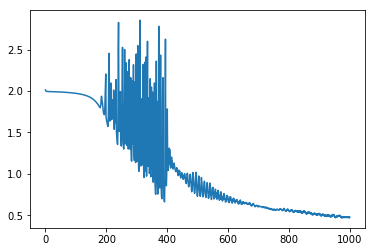

In [22]:
plt.plot(loss1.numpy(), label="Default");